# Exploratory Data Analysis Using Python

**Referencia**:[Swaathi Kakarla](https://www.activestate.com/blog/exploratory-data-analysis-using-python/)

Exploratory Data Analysis, or EDA, is essentially a type of storytelling for statisticians. It allows us to uncover patterns and insights, often with visual methods, within data. EDA is often the first step of the data modelling process. In this phase, data engineers have some questions in hand and try to validate those questions by performing EDA.

As this article shows, you can use Python to do an EDA at any point in the Machine Learning (ML) process: 



Source:[sharpsightlabs.com](https://www.sharpsightlabs.com/blog/data-analysis-machine-learning-example-1/)

For the purpose of this tutorial, we will be using a CSV file containing the sale prices of houses and their attributes.

## Loading a Dataset

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
 
url = '..\..\data\EDA-Activestate-Blog.csv'
df = pd.read_csv(url, sep=",")

print(df.head(5))

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD      

In [14]:
# A quick look at the dataset using “df.columns” shows:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Exploring A Dataset

A quick look at the dataset can be done by calling on the Pandas “info” method, like so:

This shows us the number of non-null cells for each column. It is obvious from this data that the columns, MiscFeature (55), Fence (281), PoolQC (7), and Alley (91) are not relevant to building a model as they are present in far fewer quantities.

All these columns can be dropped.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Distributions

The data describes **house sale prices** against **house attributes**. In order for the data model to learn accurately, we need to train it with data that does not have too many outliers. Testing data should ideally be a narrow representation of a single problem.

To visualize the distribution of the sale price:

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


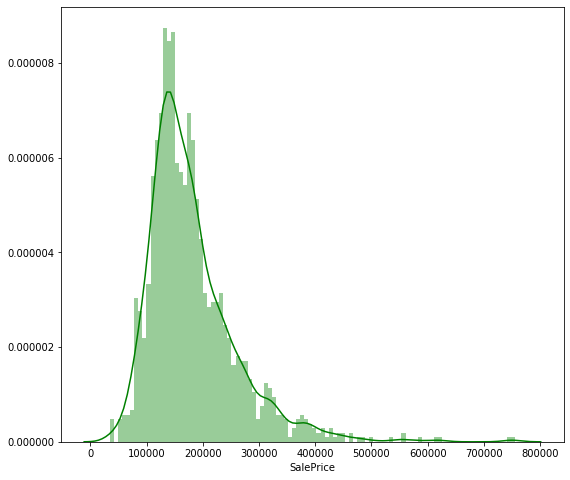

In [16]:
# Sale Price Distribution
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

# plt.savefig('sale-price-dist.png')

From the above graph we can see that there are very few outliers. Before moving on to the model-building phase, they will be removed.

Now, let us build similar distributions for the other columns and see the relationship they have to sale price.

To extract all integer columns:

## Dealing with Outliers

In [17]:
anomalies = []

# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    
    print(lower_limit)
    print(upper_limit)

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row ## obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

anomalies = find_anomalies(df.set_index('Id')[['SalePrice']])
anomalies

SalePrice    22036.190125
dtype: float64
SalePrice    339806.201656
dtype: float64


[12,
 54,
 59,
 113,
 152,
 162,
 179,
 186,
 225,
 232,
 279,
 310,
 314,
 321,
 322,
 337,
 350,
 378,
 379,
 390,
 441,
 474,
 478,
 482,
 497,
 516,
 528,
 586,
 592,
 609,
 643,
 645,
 655,
 662,
 665,
 679,
 689,
 692,
 703,
 719,
 770,
 775,
 799,
 804,
 826,
 878,
 899,
 988,
 991,
 1047,
 1143,
 1170,
 1182,
 1183,
 1229,
 1244,
 1268,
 1269,
 1354,
 1374,
 1389,
 1418,
 1438]

In [18]:
# remove outlies using INDEX VALUE:
df.drop(anomalies, inplace=True)

count      1397.000000
mean     180787.690050
std       78328.248096
min       34900.000000
25%      130000.000000
50%      163500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


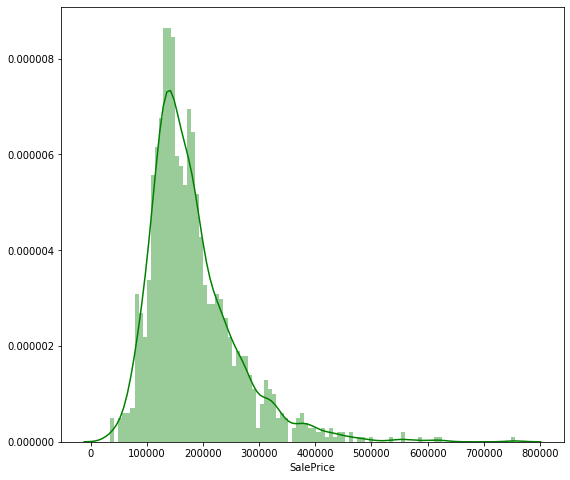

In [19]:
# Sale Price Distribution
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

# plt.savefig('sale-price-dist.png')

In [20]:
# Integer Distributions
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [21]:
# plot all columns
plt.figure(figsize=(9, 8))
sns.distplot(df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8));

# plt.savefig('int-column-dist.png')

TypeError: unsupported operand type(s) for +: 'AxesSubplot' and 'AxesSubplot'

From the above figure, `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea` share a similar distribution to the `SalePrice` distribution. The next step is to uncover correlations between the Xs (house attributes) and the Y (sale price).

Remember folks, correlation is not causation!

## Correlations

To find those features that have a strong correlation with SalePrice, let’s perform the following

In [22]:
# Correlations
df_num_corr = df_num.corr()['SalePrice'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)

print("There are {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There are 10 strongly correlated values with SalePrice:
OverallQual     0.792519
GrLivArea       0.697752
GarageCars      0.642804
GarageArea      0.628085
TotalBsmtSF     0.613672
1stFlrSF        0.601864
FullBath        0.558387
YearBuilt       0.531870
TotRmsAbvGrd    0.527686
YearRemodAdd    0.515008
Name: SalePrice, dtype: float64


Perfect! We now know there is a strong correlation between these values. This validates the entire dataset, and the effort spent by ML/AI engineers in the next phase should be fruitful.

Now, what about correlations of all the other attributes? It would be too hard to interpret feature-to-feature relationships using distributions. Let’s use a heatmap for this.

## Feature To Feature Relationships

To plot a heatmap between these features, let’s perform the following:

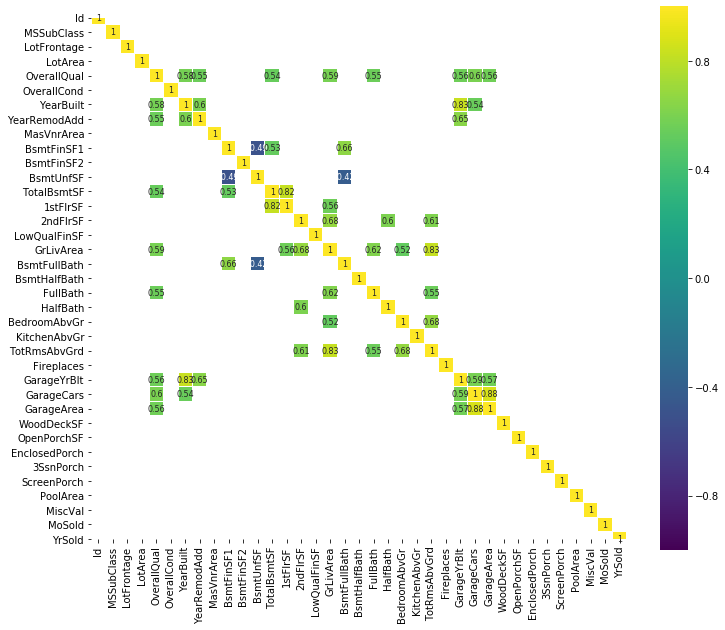

In [23]:
# Heatmap
corr = df_num.drop('SalePrice', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# plt.savefig('heatmap.png')

There are a lot of interesting relationships between the features:

- The HalfBath/2ndFlrSF relationship indicates that people give importance to having a half bath on the second floor.
- 1stFlrSF/TotalBsmtSF relationship indicates that the bigger the first floor is, the larger the basement is.

These relationships help us to reconfigure the dataset by removing columns that mean the same thing. This allows us to work with a smaller set of variations, leading to a theoretically higher accuracy.

## Conclusion

An ML or AI model can improve significantly if it is pruned and manipulated in the right way. Developers should focus much more time on performing an EDA and then cleaning up the data in order to make building the ML/AI model much easier and more efficient.